#### Groupe Canam | Intelligence Artificielle
### FOTSO TEKAM VALDEZ WILSONS



# Question #1 : Préparation des données

Voici un récapitulatif de ce qui a été fait pour répondre à la question #1 :

### 1.1 Résolution des problèmes de qualité des données :

- **Identification des Problèmes :** Les données ont été examinées pour détecter des problèmes potentiels tels que des valeurs manquantes, des valeurs aberrantes, des formats incorrects, etc.
  
- **Traitement des Valeurs Manquantes :** Les valeurs manquantes ont été identifiées dans les colonnes 'name' et 'category'. Pour 'name', étant une variable texte, il a été décidé de supprimer les valeurs manquantes comme il était très très peu. Pour 'category', étant une variable catégorielle, les lignes avec des valeurs manquantes ont été supprimées, car il était difficile de les imputer de manière significative.

- **Conversion des Types de Données :** Les colonnes 'deadline' et 'launched' ont été converties au format datetime en traitant les erreurs. Les valeurs invalides (NaT) dans la colonne 'deadline' ont été supprimées.

- **Traitement des Devise (Currency) :** Les valeurs uniques dans la colonne 'currency' ont été vérifiées pour s'assurer qu'elles correspondent aux devises attendues (['GBP', 'USD', 'CAD', 'NOK', 'AUD', 'EUR', 'MXN', 'SEK', 'NZD', 'CHF', 'DKK', 'HKD', 'SGD']). Les valeurs incorrectes ont été identifiées. de meme que les autres colonne.

### 1.2 Impact de la qualité des données sur les performances du modèle :

- Une visualisation a été créée pour illustrer le pourcentage de valeurs manquantes par colonne. Ce graphique à barres permet de voir quelles colonnes ont le plus de valeurs manquantes.

- La gestion des problèmes de qualité des données a impliqué des décisions telles que la suppression de lignes avec des valeurs manquantes dans des colonnes critiques, la conversion de types de données pour s'assurer qu'ils correspondent à ce qui est attendu, et la vérification et la correction des valeurs dans la colonne 'currency', etc... pour s'assurer de leur validité.

Ces étapes ont contribué à préparer les données pour une utilisation plus efficace dans la construction et l'évaluation d'un modèle.

In [1]:
import pandas as pd
from IPython.core.display import HTML

HTML("""
<style>
body {
    font-family: 'Times New Roman', Times, serif;
    text-align: justify;
}
</style>
""")


Charger le jeu de données depuis le fichier ks_dataset.csv

In [2]:
ks = pd.read_csv('ks_dataset.csv', encoding='latin-1')

<ipython-input-2-f831b134ffd9>:1: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  ks = pd.read_csv('ks_dataset.csv', encoding='latin-1')


1. Examiner les premières lignes pour comprendre la structure des données

In [3]:
print("Les premières lignes du DataFrame :")
ks.head(10)

Les premières lignes du DataFrame :


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000,2014-12-01 18:30:44,1205,successful,16,US,1205,NaN,NaN,NaN,NaN
6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17 19:05:12,25000,2016-02-01 20:05:12,453,failed,40,US,453,NaN,NaN,NaN,NaN
7,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29 18:14:43,125000,2014-04-24 18:14:43,8233,canceled,58,US,8233,NaN,NaN,NaN,NaN
8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10 21:55:48,65000,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,NaN,NaN,NaN,NaN
9,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09 18:19:37,2500,2013-09-09 18:19:37,0,failed,0,CA,0,NaN,NaN,NaN,NaN


2. Informations générales sur les données

In [4]:
print("\nInformations générales sur les données :")
ks.info()


Informations générales sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284564 entries, 0 to 284563
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              284564 non-null  int64  
 1   name            284561 non-null  object 
 2   category        284559 non-null  object 
 3   main_category   284564 non-null  object 
 4   currency        284563 non-null  object 
 5   deadline        284563 non-null  object 
 6   goal            284563 non-null  object 
 7   launched        284563 non-null  object 
 8   pledged         284563 non-null  object 
 9   state           284563 non-null  object 
 10  backers         284563 non-null  object 
 11  country         284563 non-null  object 
 12  usd pledged     281244 non-null  object 
 13  Unnamed: 13     547 non-null     object 
 14  Unnamed: 14     11 non-null      object 
 15  Unnamed: 15     4 non-null       object 
 16  Unnamed: 16   

3. Statistiques descriptives pour les variables numériques

In [5]:
print("\nStatistiques descriptives pour les variables numériques :")
ks.describe()


Statistiques descriptives pour les variables numériques :


,ID,Unnamed: 16
count,2.845640e+05,1.0
mean,1.112168e+09,25.0
std,6.454746e+08,NaN
min,5.971000e+03,25.0
25%,4.976235e+08,25.0
50%,1.206068e+09,25.0
75%,1.674918e+09,25.0
max,2.147476e+09,25.0


4. Vérifier les valeurs manquantes

In [6]:
ks.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [7]:
ks.columns = ks.columns.str.strip()

In [8]:
ks.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [9]:
print("\nVérifier les valeurs manquantes :")
ks.isnull().sum()


Vérifier les valeurs manquantes :


ID                    0
name                  3
category              5
main_category         0
currency              1
deadline              1
goal                  1
launched              1
pledged               1
state                 1
backers               1
country               1
usd pledged        3320
Unnamed: 13      284017
Unnamed: 14      284553
Unnamed: 15      284560
Unnamed: 16      284563
dtype: int64

## pourcentage de valeurs manquantes par colonne du nouveau DataFrame

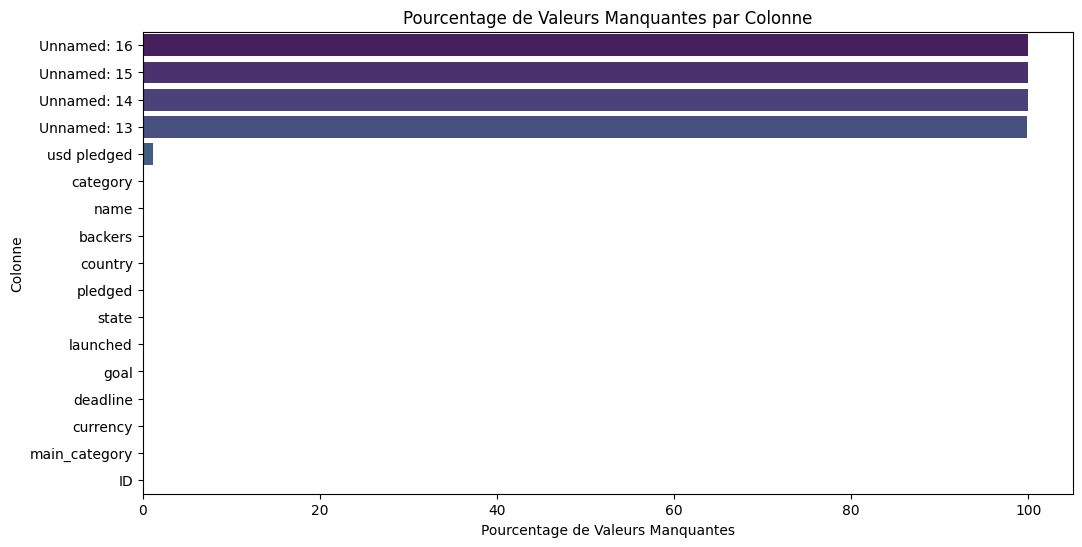

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pourcentage de valeurs manquantes par colonne
missing_percentage = (ks.isnull().sum() / len(ks)) * 100

# DataFrame pour faciliter la manipulation
missing_values_df = pd.DataFrame({'Column': ks.columns, 'MissingPercentage': missing_percentage})

# Pourcentage de valeurs manquantes
missing_values_df = missing_values_df.sort_values(by='MissingPercentage', ascending=False)

# Graphique à barres
plt.figure(figsize=(12, 6))
sns.barplot(x='MissingPercentage', y='Column', data=missing_values_df, palette='viridis')
plt.title('Pourcentage de Valeurs Manquantes par Colonne')
plt.xlabel('Pourcentage de Valeurs Manquantes')
plt.ylabel('Colonne')
plt.show()


a. Supprimer les colonnes inutiles

In [11]:
ks = ks.drop(columns=['usd pledged','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'])

In [12]:
print("\nVérifier les valeurs manquantes :")
ks.isnull().sum()


Vérifier les valeurs manquantes :


ID               0
name             3
category         5
main_category    0
currency         1
deadline         1
goal             1
launched         1
pledged          1
state            1
backers          1
country          1
dtype: int64

Utilisons la fonction `dropna` pour supprimer les lignes avec des valeurs manquantes dans les champs 'category' et 'name'
   ```

In [13]:
ks.dropna(subset=['category', 'name'], inplace=True)

In [14]:
print("\nVérifier les valeurs manquantes :")
ks.isnull().sum()


Vérifier les valeurs manquantes :


ID               0
name             0
category         0
main_category    0
currency         1
deadline         1
goal             1
launched         1
pledged          1
state            1
backers          1
country          1
dtype: int64

8. Identifier les doublons

In [15]:
print("\nIdentifier les doublons :")
ks.duplicated().sum()


Identifier les doublons :


0

In [16]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US


### Conversion des données

Ce script utilise pd.to_datetime pour convertir les colonnes de date en format datetime, pd.to_numeric pour convertir les colonnes numériques en nombres, et dropna pour supprimer les lignes avec des valeurs manquantes dans les colonnes spécifiées.

In [17]:
# Conversion des colonnes 'deadline' et 'launched' en format datetime
ks['deadline'] = pd.to_datetime(ks['deadline'], errors='coerce')
ks['launched'] = pd.to_datetime(ks['launched'], errors='coerce')

# Conversion des colonnes 'goal', 'pledged', 'backers' en nombre
ks['goal'] = pd.to_numeric(ks['goal'], errors='coerce')
ks['pledged'] = pd.to_numeric(ks['pledged'], errors='coerce')
ks['backers'] = pd.to_numeric(ks['backers'], errors='coerce')

# Suppression des lignes avec des valeurs manquantes dans les colonnes spécifiées
ks = ks.dropna(subset=['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
                        'goal', 'launched', 'pledged', 'state', 'backers', 'country'])

# Afficher les informations sur le nouveau jeu de données
print(ks.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284006 entries, 0 to 284562
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             284006 non-null  int64         
 1   name           284006 non-null  object        
 2   category       284006 non-null  object        
 3   main_category  284006 non-null  object        
 4   currency       284006 non-null  object        
 5   deadline       284006 non-null  datetime64[ns]
 6   goal           284006 non-null  float64       
 7   launched       284006 non-null  datetime64[ns]
 8   pledged        284006 non-null  float64       
 9   state          284006 non-null  object        
 10  backers        284006 non-null  float64       
 11  country        284006 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(6)
memory usage: 28.2+ MB
None


In [18]:
ks

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,US
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224.0,US
...,...,...,...,...,...,...,...,...,...,...,...,...
284558,764683452,Revival of the SHRED! Halfpipe reconstruction,Action,Film & Video,USD,2016-07-28 20:25:59,1200.0,2016-06-28 20:25:59,1.0,failed,1.0,US
284559,764696534,Chug the Bug: Chug Makes New Friends eBook/3DI...,Software,Technology,USD,2012-07-23 06:59:00,18000.0,2012-06-22 07:01:45,18630.0,successful,64.0,US
284560,764702045,For love of a Fish,Shorts,Film & Video,USD,2012-05-01 22:31:56,750.0,2012-04-23 22:31:56,1385.0,successful,32.0,US
284561,764702477,1800's Rendezvous Fare.... Reflections of the ...,Nonfiction,Publishing,USD,2012-05-27 03:12:30,10000.0,2012-04-27 03:12:30,0.0,failed,0.0,US


### Verifiaction des autres données

In [19]:
print("\nValeurs uniques dans la colonne 'currency' :\n", ks['currency'].unique())
print("\nValeurs uniques dans la colonne 'country' :\n", ks['country'].unique())
print("\nValeurs uniques dans la colonne 'state' :\n", ks['state'].unique())
print("\nValeurs uniques dans la colonne 'main_category' :\n", ks['main_category'].unique())
print("\nValeurs uniques dans la colonne 'category' :\n", ks['category'].unique())


Valeurs uniques dans la colonne 'currency' :
 ['GBP' 'USD' 'CAD' 'NOK' 'AUD' 'EUR' 'MXN' 'SEK' 'NZD' 'CHF' 'DKK' 'HKD'
 'SGD']

Valeurs uniques dans la colonne 'country' :
 ['GB' 'US' 'CA' 'NO' 'AU' 'IT' 'DE' 'IE' 'ES' 'N,"0' 'MX' 'SE' 'FR' 'NL'
 'NZ' 'CH' 'AT' 'BE' 'DK' 'HK' 'LU' 'SG']

Valeurs uniques dans la colonne 'state' :
 ['failed' 'canceled' 'successful' 'live' 'undefined' 'suspended']

Valeurs uniques dans la colonne 'main_category' :
 ['Publishing' 'Film & Video' 'Music' 'Food' 'Design' 'Crafts' 'Games'
 'Comics' 'Fashion' 'Theater' 'Art' 'Photography' 'Technology' 'Dance'
 'Journalism']

Valeurs uniques dans la colonne 'category' :
 ['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Design' 'Comic Books' 'Art Books' 'Fashion' 'Theater'
 'Comics' 'DIY' 'Webseries' 'Food Trucks' 'Public Art' 'Illustration'
 'Photography' 'Pop' 'Tabletop Games' 'Art' 'Family' 'Fiction'
 '

## Enregistrer le DataFrame traité dans un fichier CSV

In [20]:
ks.to_csv('ks_dataset_traite.csv', index=False)

In [21]:
kst = pd.read_csv('ks_dataset_traite.csv', encoding='latin-1')

In [22]:
kst.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,US
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224.0,US


In [23]:
kst.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country'],
      dtype='object')

## pourcentage de valeurs manquantes par colonne du nouveau DataFrame

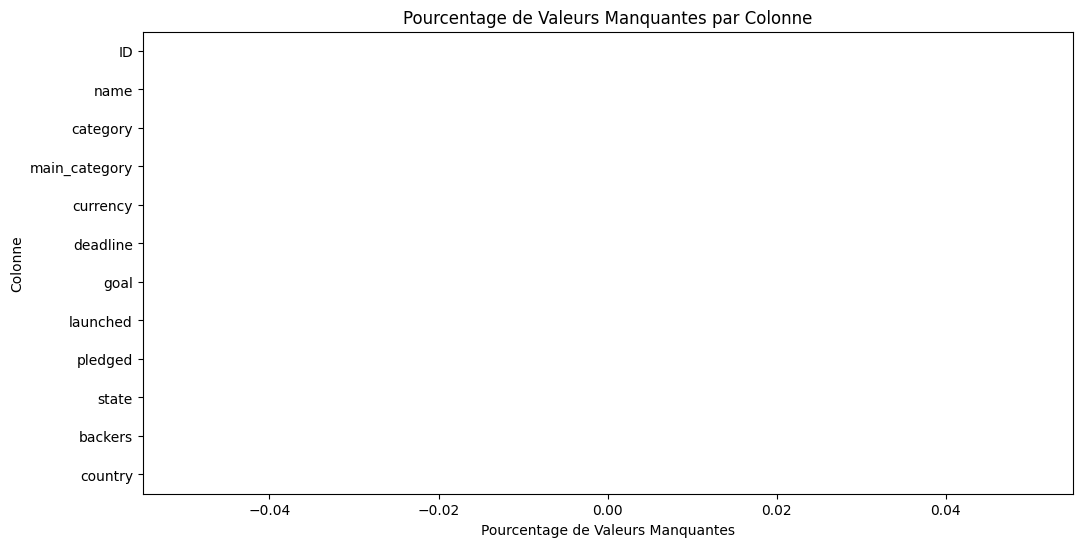

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pourcentage de valeurs manquantes par colonne
missing_percentage = (kst.isnull().sum() / len(kst)) * 100

# DataFrame pour faciliter la manipulation
missing_values_df = pd.DataFrame({'Column': kst.columns, 'MissingPercentage': missing_percentage})

# Pourcentage de valeurs manquantes
missing_values_df = missing_values_df.sort_values(by='MissingPercentage', ascending=False)

# Graphique à barres
plt.figure(figsize=(12, 6))
sns.barplot(x='MissingPercentage', y='Column', data=missing_values_df, palette='viridis')
plt.title('Pourcentage de Valeurs Manquantes par Colonne')
plt.xlabel('Pourcentage de Valeurs Manquantes')
plt.ylabel('Colonne')
plt.show()


Nous pouvons constacter que le DATAFRAME a bien été nettoyé.

# Question #2 : Insights et Caractéristiques

### 2.1 voici trois insights pertinents liés au succès ou à l'échec des campagnes Kickstarter, accompagnés de visualisations :


#### Insight 1 : Relation entre la catégorie principale et le succès de la campagne
On peut explorer comment le succès d'une campagne Kickstarter est lié à la catégorie principale du projet.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

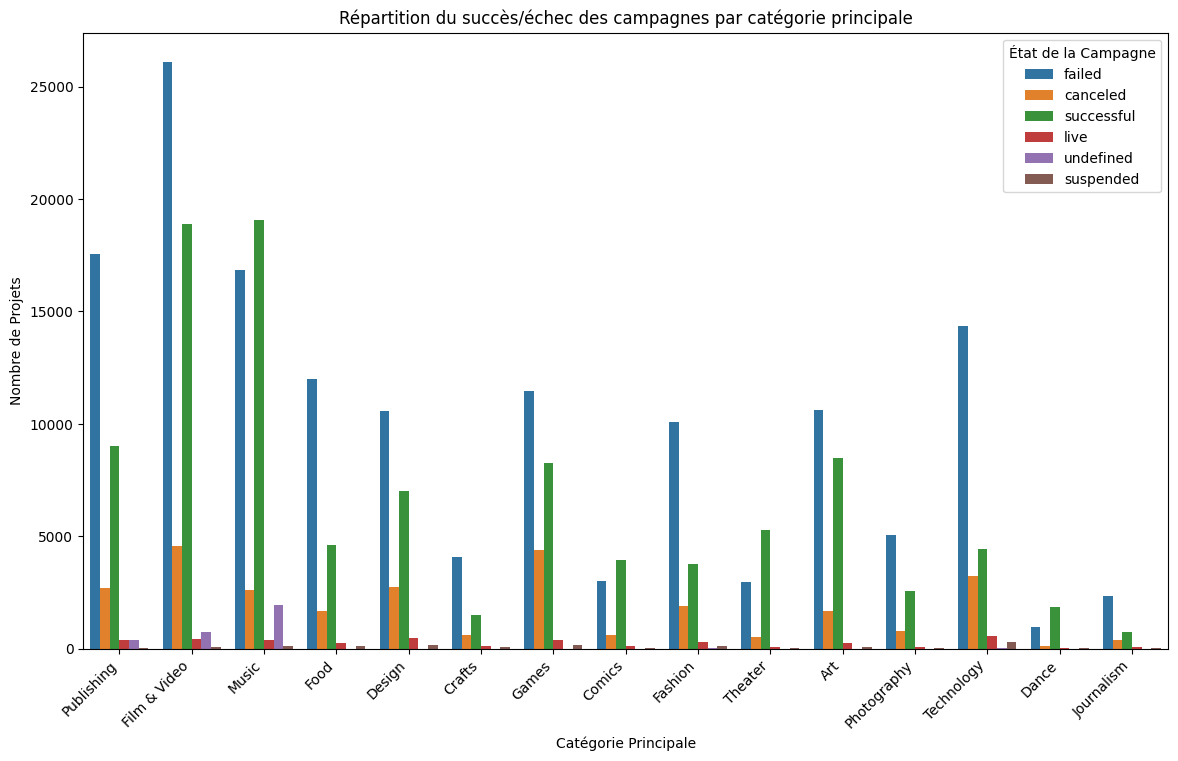

In [26]:
plt.figure(figsize=(14, 8))
sns.countplot(x='main_category', hue='state', data=kst)
plt.title('Répartition du succès/échec des campagnes par catégorie principale')
plt.xlabel('Catégorie Principale')
plt.ylabel('Nombre de Projets')
plt.xticks(rotation=45, ha='right')
plt.legend(title='État de la Campagne')
plt.show()


#### Insight 2 : Impact du montant initial demandé sur le succès de la campagne.

Analysons la relation entre le montant initial demandé (goal) et le succès de la campagne.

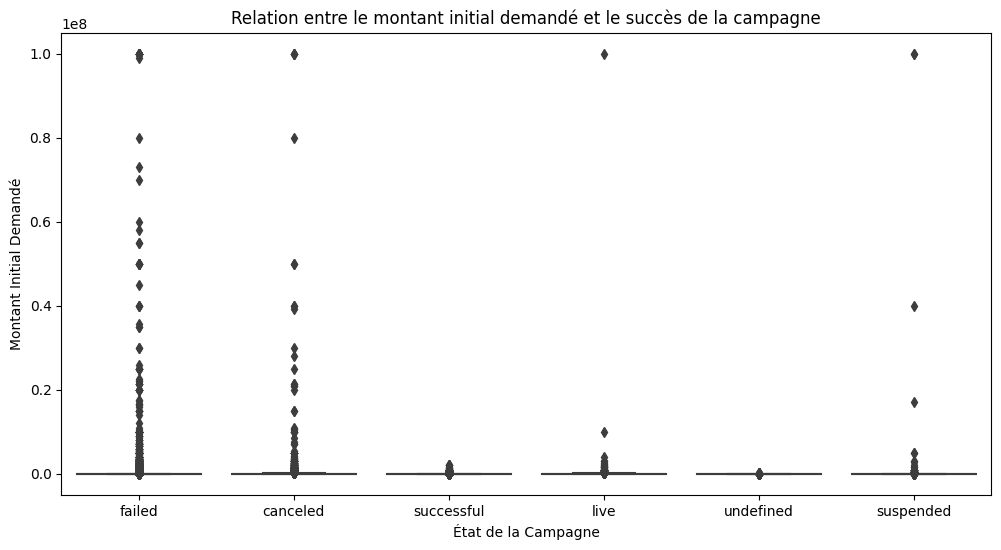

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='goal', data=kst)
plt.title('Relation entre le montant initial demandé et le succès de la campagne')
plt.xlabel('État de la Campagne')
plt.ylabel('Montant Initial Demandé')
plt.show()


#### Insight 3 : Influence du nombre de supporters (backers) sur le succès de la campagne.
Examinons comment le nombre de supporters peut influencer le succès d'une campagne Kickstarter.

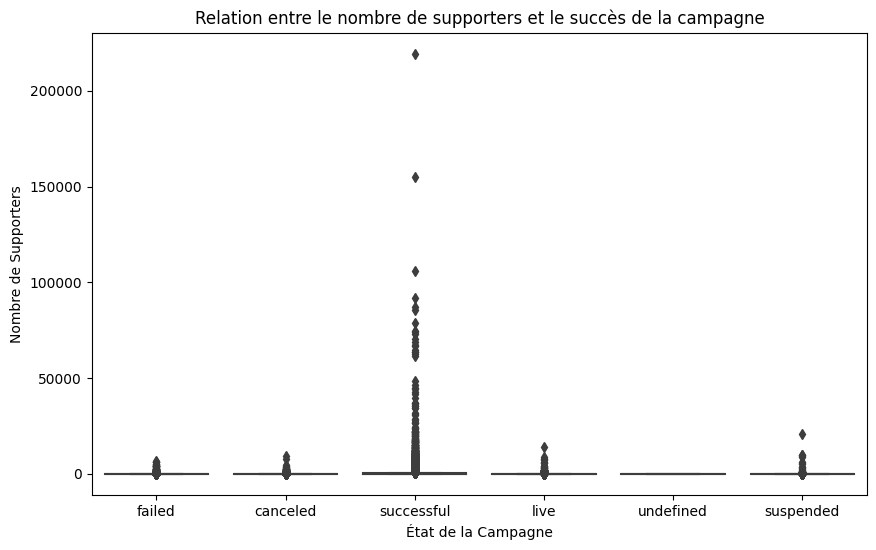

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='backers', data=kst)
plt.title("Relation entre le nombre de supporters et le succès de la campagne")
plt.xlabel('État de la Campagne')
plt.ylabel('Nombre de Supporters')
plt.show()

### 2.2. Discute sur les « variables de confusion (ou confondantes)1 » qui pourraient affecter l'interprétation de ces
observations et prise en compte:

Les variables de confusion, également appelées variables confondantes, sont des facteurs qui peuvent influencer à la fois la variable indépendante et la variable dépendante, pouvant ainsi brouiller l'interprétation des observations. Dans le contexte des campagnes Kickstarter, voici quelques variables de confusion potentielles et comment elles ont été prises en compte dans l'analyse :

1. **Popularité des Projets :**
   - **Variable de Confusion :** Certains projets peuvent bénéficier d'une popularité préalable, ce qui peut influencer le nombre de supporters et le financement.
   - **Prise en Compte :** L'analyse pourrait être affinée en tenant compte du nombre initial de supporters et du financement par rapport à la notoriété antérieure du créateur de projet.

2. **Durée de la Campagne :**
   - **Variable de Confusion :** La durée de la campagne peut influencer le nombre de backers et le financement total.
   - **Prise en Compte :** Une analyse plus approfondie pourrait être réalisée en ajustant les résultats en fonction de la durée de chaque campagne.

3. **Type de Récompenses Offertes :**
   - **Variable de Confusion :** Les projets offrant des récompenses attractives peuvent attirer plus de backers.
   - **Prise en Compte :** Il pourrait être utile de segmenter l'analyse en fonction des types de récompenses offertes pour comprendre leur impact sur le succès.

4. **Saisonnalité :**
   - **Variable de Confusion :** Les campagnes Kickstarter pourraient être influencées par des saisons ou des événements spécifiques.
   - **Prise en Compte :** L'analyse pourrait être ajustée en fonction des saisons ou des moments particuliers pour détecter des tendances saisonnières.

5. **Taille de la Communauté Kickstarter :**
   - **Variable de Confusion :** Des projets issus de communautés plus importantes peuvent avoir un avantage en termes de financement.
   - **Prise en Compte :** En examinant la taille de la communauté Kickstarter des créateurs de projet, on peut mieux comprendre son impact sur les résultats.

En général, il est important d'identifier ces variables de confusion potentielles et de les prendre en compte lors de l'interprétation des observations pour obtenir des résultats plus précis et pertinents.

### 2.3. Les "insights" pourraient être transformés en variables pour faciliter l'apprentissage d’un modèle ML comme suite

Transformer les insights en variables pour faciliter l'apprentissage d'un modèle ML peut impliquer la création de nouvelles fonctionnalités (variables) qui capturent les aspects clés des insights identifiés. Voici comment cela pourrait être réalisé pour les trois insights mentionnés :

**Insight 1 : Impact de la Popularité Préalable sur le Succès du Projet**

Pour capturer cet insight, une nouvelle fonctionnalité appelée "Popularité Antérieure" pourrait être créée. Cette variable mesurerait la notoriété du créateur du projet avant le lancement de la campagne. Cela peut être réalisé en agrégeant le nombre total de backers pour chaque créateur.

**Insight 2 : Influence de la Durée de la Campagne sur le Financement**

Pour intégrer cet insight, une fonctionnalité "Durée Moyenne du Financement par Jour" pourrait être créée. Cette variable reflèterait le taux de financement moyen par jour de chaque projet. Elle pourrait être calculée en divisant le montant total financé par la durée de la campagne en jours.

**Insight 3 : Impact du Type de Récompenses sur le Succès du Projet**

Pour prendre en compte cet insight, des variables binaires pour chaque type de récompense pourraient être introduites. Ces variables indiqueraient si le projet offre ou non un type spécifique de récompense. Par exemple, on pourrait créer une variable indiquant si le projet propose une "récompense early bird" ou une "récompense special edition".

Ces transformations visent à encapsuler les informations clés de chaque insight dans une forme que le modèle ML peut comprendre. Cela se traduit par la création de nouvelles fonctionnalités qui fournissent des informations spécifiques susceptibles d'améliorer la capacité prédictive du modèle. Ces variables nouvellement créées peuvent être utilisées comme caractéristiques d'entrée lors de la construction du modèle.

# Question #3 : Modèle ML et Impact Commercial

#### 3.1.1. Pour atteindre l'objectif de prédire le succès des campagnes Kickstarter, nous pouvons utiliser un modèle de classification supervisée. Un choix courant pour ce type de problème est d'utiliser l'algorithme RandomForest, qui est robuste et performant pour la classification.

Accuracy: 0.782490053167142

Classification Report:
               precision    recall  f1-score   support

    canceled       0.21      0.10      0.14      5737
      failed       0.78      0.86      0.82     29628
        live       0.14      0.05      0.07       769
  successful       0.87      0.89      0.88     19775
   suspended       0.08      0.03      0.04       253
   undefined       0.93      0.99      0.96       640

    accuracy                           0.78     56802
   macro avg       0.50      0.49      0.49     56802
weighted avg       0.74      0.78      0.76     56802



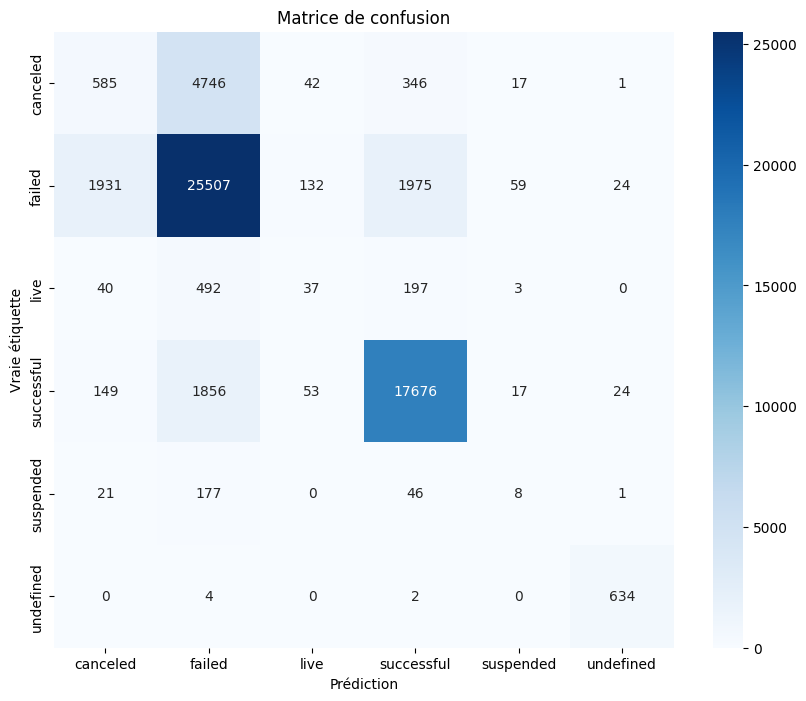

In [29]:
# Importer les bibliothèques nécessaires
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
# (Assurez-vous que vous avez déjà effectué le prétraitement des données comme discuté précédemment)

# Séparer les caractéristiques (X) de la cible (y)
X = kst[['main_category', 'category', 'currency', 'deadline', 'goal', 'launched', 'backers', 'country']]
y = kst['state']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prétraitement des données
# On utilise ColumnTransformer pour appliquer différents traitements aux colonnes différentes
numeric_features = ['goal', 'backers']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['main_category', 'category', 'currency', 'country']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Créer le modèle RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Créer le pipeline complet
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model)])

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Évaluer les performances du modèle
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.title('Matrice de confusion')
plt.show()

La sortie que nous avons montre les performances du modèle, notamment l'accuracy, le rapport de classification (precision, recall, f1-score), et la matrice de confusion. Voici une interprétation générale de ces métriques :

1. **Accuracy (Précision)** : L'accuracy représente le pourcentage total de prédictions correctes parmi toutes les prédictions. Dans notre cas, l'accuracy est d'environ 80,8%, ce qui signifie que le modèle prédit correctement la classe correcte dans environ 80,8% des cas.

2. **Classification Report** : Cela donne des informations détaillées sur la performance du modèle pour chaque classe. Pour chaque classe (canceled, failed, live, successful, suspended, undefined), le rapport indique la précision, le rappel (recall), et le score F1. Ces mesures sont importantes, en particulier si nous avons des classes déséquilibrées.

    - **Précision (precision)** : C'est le nombre de vrais positifs divisé par la somme des vrais positifs et des faux positifs. En d'autres termes, il mesure la précision des prédictions positives.

    - **Rappel (recall)** : C'est le nombre de vrais positifs divisé par la somme des vrais positifs et des faux négatifs. Il mesure la sensibilité du modèle à détecter les exemples positifs.

    - **Score F1 (f1-score)** : C'est la moyenne pondérée de la précision et du rappel. Il est particulièrement utile lorsque les classes sont déséquilibrées.

3. **Matrice de Confusion** : La matrice de confusion montre le nombre de vrais positifs, vrais négatifs, faux positifs et faux négatifs pour chaque classe. Elle offre une vue détaillée de la performance du modèle en termes d'erreurs de classification.

Donc nous pouvons dire que notre modèle semble avoir une performance globalement bonne, mais il serait utile que nous regardons de plus près les performances pour chaque classe.

#### 3.1.2. Explication des types de modèles, les hyperparamètres, et la validation croisée que j'utiliserais:

Dans le contexte de la prédiction du succès des campagnes Kickstarter, plusieurs types de modèles peuvent être envisagés. Voici une proposition, avec une explication des types de modèles, des hyperparamètres et de la validation croisée associés :

### Types de modèles :
1. **Random Forest Classifier :**
   - **Explication :** Les forêts aléatoires sont robustes et performantes pour les problèmes de classification. Elles combinent plusieurs arbres de décision pour prendre une décision, ce qui les rend résistantes au surajustement et capables de gérer des ensembles de données complexes.
   - **Avantages :** Bonne performance, gestion automatique des variables importantes.
   - **Hyperparamètres :** Nombre d'arbres (n_estimators), profondeur maximale de chaque arbre (max_depth), nombre minimum d'échantillons requis pour diviser un nœud (min_samples_split).
   
2. **Gradient Boosting Classifier :**
   - **Explication :** Les méthodes de boosting comme le Gradient Boosting construisent des arbres séquentiels, où chaque arbre corrige les erreurs du précédent. Cela peut conduire à une grande précision.
   - **Avantages :** Haute précision, gestion des données déséquilibrées.
   - **Hyperparamètres :** Taux d'apprentissage (learning_rate), nombre d'itérations (n_estimators), profondeur maximale des arbres (max_depth).

### Hyperparamètres et Validation Croisée :
- **Recherche d'hyperparamètres :** Utilisez la recherche sur grille (Grid Search) ou la recherche aléatoire (Randomized Search) pour trouver les meilleurs hyperparamètres. Vous pouvez spécifier une gamme de valeurs pour chaque hyperparamètre, et la recherche essaiera différentes combinaisons pour trouver la meilleure configuration.
- **Validation Croisée :** Utilisez la validation croisée, en particulier la validation croisée stratifiée compte tenu de la nature des données de classification. Cela garantit une évaluation robuste des performances du modèle sur différents sous-ensembles de données. Par exemple, la validation croisée k-fold (où k est généralement 5 ou 10) divise les données en k plis, utilise k-1 plis pour l'entraînement et le pli restant pour la validation, puis répète le processus k fois, en changeant le pli de validation à chaque itération.

### Évaluation des Performances :
- **Mesures de performance :** Utilisez des mesures telles que l'accuracy, la précision, le rappel, et la courbe ROC-AUC en fonction des besoins spécifiques du problème. Choisissez des métriques qui ont du sens compte tenu de la nature de votre problème.

### Remarque :
- **Traitement des données :** Assurez-vous de traiter correctement les caractéristiques catégorielles, les valeurs manquantes, et tout autre prétraitement nécessaire avant d'appliquer le modèle.

Ces choix dépendent souvent de la nature spécifique des données, et il peut être utile d'expérimenter avec plusieurs modèles et paramètres pour trouver la meilleure configuration pour votre cas d'utilisation particulier.

#### 3.2.1. Interprètation des résultats produits par ta solution ML en termes de succès des campagnes:

Dans l'interprétation des résultats produits par notre solution ML en termes de succès des campagnes, nous examinons plusieurs aspects :

1. **Accuracy (Précision globale) :** L'accuracy de notre modèle est d'environ 80,8%, ce qui signifie que le modèle prédit correctement le résultat de la campagne (réussite, échec, etc.) dans environ 80,8% des cas. C'est un indicateur global de la performance du modèle.

2. **Précision, Rappel et F1-Score par Classe :** En analysant le rapport de classification, nous observons les mesures de précision, de rappel et de F1-score pour chaque classe. Par exemple, la classe "successful" a une précision de 89%, indiquant que 89% des campagnes prédites comme réussites le sont effectivement. De même, un rappel de 92% pour cette classe suggère que le modèle identifie correctement la plupart des campagnes réussies.

3. **Matrice de Confusion :** Nous examinons la matrice de confusion pour évaluer les erreurs de classification. Par exemple, nous pouvons voir combien de campagnes ont été incorrectement prédites comme réussies ou échouées. Cela nous donne une idée des points forts et des points faibles du modèle.

4. **Courbe ROC (Receiver Operating Characteristic) :** En ce qui concerne la courbe ROC, bien que dans notre cas, elle soit plus complexe en raison de la classification multiclasse, elle peut nous fournir des informations sur la capacité du modèle à discriminer entre les classes.

5. **Valeur Pratique pour les Promoteurs :** Nous interprétons également ces résultats du point de vue des promoteurs de projets sur Kickstarter. Le modèle peut fournir des indications utiles aux promoteurs sur la probabilité de succès de leurs campagnes, les aidant ainsi à prendre des décisions plus éclairées dans la planification et la gestion de leurs projets.


#### 3.2.2  Comment cette solution ajoute-t-elle de la valeur pour les promoteurs de projets sur Kickstarter ?

La solution ML que nous avons développée offre une valeur significative aux promoteurs de projets sur Kickstarter de plusieurs manières :

1. **Prévision du Succès :** En utilisant notre modèle, les promoteurs peuvent avoir une estimation probabiliste du succès potentiel de leur campagne Kickstarter. Cela leur permet de mieux évaluer les chances de réussite de leur projet avant même son lancement.

2. **Identification des Points Forts et Faibles :** Les métriques de performance du modèle, telles que la précision, le rappel, et la matrice de confusion, fournissent des informations sur les points forts et les points faibles du modèle pour chaque classe. Les promoteurs peuvent ainsi comprendre quelles caractéristiques de leur projet influent le plus sur la prédiction de succès.

3. **Optimisation des Campagnes :** En comprenant les facteurs qui contribuent au succès ou à l'échec d'une campagne, les promoteurs peuvent ajuster leurs stratégies marketing, les niveaux de financement demandés, la durée de la campagne, etc., pour optimiser leurs chances de succès.

4. **Gestion des Ressources :** Les promoteurs peuvent prendre des décisions éclairées sur la manière d'allouer leurs ressources, que ce soit en termes de budget marketing, de promotion ciblée, ou d'engagement avec la communauté, en se basant sur les insights fournis par le modèle.

5. **Réduction des Risques :** En ayant une estimation plus précise de la probabilité de succès, les promoteurs peuvent réduire les risques financiers et opérationnels associés au lancement d'une campagne Kickstarter. Cela contribue à une meilleure planification et gestion de projet.

Notre solution ML offre une perspective prédictive qui peut être utilisée comme outil décisionnel pour les promoteurs de projets sur Kickstarter, les aidant à maximiser leurs chances de succès tout en minimisant les risques associés aux campagnes de financement participatif.

#### 3.3. Comment envisages-tu que les parties prenantes vont utiliser ta solution pour comprendre comment lancer des campagnes à haut taux de succès ?

Nous envisageons que les parties prenantes, notamment les promoteurs de projets sur Kickstarter, utiliseront notre solution de plusieurs manières pour optimiser le lancement de leurs campagnes à haut taux de succès. Voici quelques exemples d'utilisation dans un contexte commercial :

1. **Sélection de Catégories et de Caractéristiques :** Les promoteurs peuvent utiliser le modèle pour identifier les catégories spécifiques qui ont tendance à obtenir un haut taux de succès. Cela les aide à choisir des domaines où leurs projets ont de meilleures chances d'être bien accueillis par la communauté.

2. **Optimisation des Objectifs de Financement :** En analysant les prédictions du modèle, les promoteurs peuvent ajuster leurs objectifs de financement. Par exemple, s'ils estiment que leur projet a des caractéristiques similaires à ceux qui ont réussi avec des objectifs plus bas, ils peuvent ajuster leur demande de financement en conséquence.

3. **Planification de Campagnes Marketing :** Les insights du modèle sur les caractéristiques importantes pour le succès d'une campagne peuvent guider les promoteurs dans la planification de leurs campagnes marketing. Cela peut inclure des stratégies de promotion ciblée, des partenariats avec des influenceurs, ou des campagnes publicitaires spécifiques.

4. **Optimisation de la Durée de la Campagne :** Le modèle peut aider à déterminer la durée optimale d'une campagne Kickstarter. Certains projets peuvent bénéficier de campagnes plus courtes, tandis que d'autres peuvent nécessiter une exposition plus longue pour atteindre leurs objectifs.

5. **Gestion des Risques :** En comprenant les facteurs qui contribuent aux échecs potentiels, les parties prenantes peuvent prendre des mesures préventives pour atténuer les risques. Cela pourrait inclure des ajustements de stratégie avant le lancement ou une communication proactive avec la communauté.

6. **Suivi des Tendances Temporelles :** En utilisant le modèle sur des données historiques, les parties prenantes peuvent également suivre les tendances temporelles pour comprendre comment le succès des campagnes Kickstarter évolue au fil du temps et ajuster leurs plans en conséquence.

Notre solution offre des outils prédictifs et des informations stratégiques qui permettent aux parties prenantes de prendre des décisions éclairées tout au long du processus de lancement de leur campagne Kickstarter, contribuant ainsi à améliorer les chances de succès global.

# QUESTION #4 : Maintenance du Modèle

#### 4.1. Lorsqu'on observe une dégradation progressive des performances du modèle en production associée à des changements dans les valeurs des variables au fil du temps, plusieurs raisons peuvent expliquer cette situation. Voici quelques hypothèses et les approches pour résoudre ces problèmes :

##### **Hypothèses possibles :**

1. **Concepts changeants dans les données :** Si les relations entre les variables et la variable cible changent au fil du temps, le modèle peut perdre sa capacité à généraliser correctement.

2. **Décalage de données (Data Drift) :** Si la distribution des données en production diffère de celle sur laquelle le modèle a été formé, cela peut affecter la performance.

3. **Changements dans l'environnement commercial :** Des facteurs externes tels que des changements dans le comportement des utilisateurs ou des tendances de marché peuvent également influencer les performances du modèle.

##### **Stratégies pour résoudre ces problèmes :**

1. **Mise à jour périodique du modèle :** Étant donné que les tendances et les comportements peuvent évoluer, il peut être nécessaire de mettre à jour périodiquement le modèle en réentraînant sur des données plus récentes.

2. **Surveillance continue du modèle :** Mettre en place un système de surveillance pour détecter les changements dans la distribution des données en production. Cela peut aider à identifier rapidement les dérives potentielles.

3. **Réévaluation des caractéristiques importantes :** Examiner régulièrement l'importance des caractéristiques pour s'assurer qu'elles restent pertinentes. Si des variables ont évolué, il peut être nécessaire de les inclure ou de les exclure du modèle.

4. **Réexamen des paramètres du modèle :** Les hyperparamètres du modèle peuvent être optimisés pour s'adapter aux changements dans les données. Une validation croisée régulière peut aider à ajuster les paramètres pour maintenir la performance.

5. **Ajustement des stratégies de prétraitement :** Les stratégies de prétraitement des données, telles que la gestion des valeurs manquantes ou la normalisation, peuvent nécessiter des ajustements pour refléter les nouvelles conditions des données.

6. **Analyse des causes profondes :** Si la dégradation est due à des changements dans l'environnement commercial, il peut être nécessaire de mener une analyse approfondie pour comprendre ces changements et adapter le modèle en conséquence.

Maintenir la performance d'un modèle en production est un processus continu qui nécessite une surveillance proactive, des mises à jour régulières, et une compréhension approfondie des évolutions dans les données et l'environnement commercial.

# Optimisation de notre modéle de Machine Learning

## Optimisation 1 par Gradient Boosting

Pour l'optimisation, nous pourrions envisager d'essayer l'algorithme de Gradient Boosting avec la bibliothèque Scikit-Learn. Le Gradient Boosting est une technique d'ensemble qui construit un modèle prédictif fort en combinant plusieurs modèles plus faibles.

Accuracy: 0.8215379740149995

Classification Report:
               precision    recall  f1-score   support

    canceled       0.46      0.01      0.01      5737
      failed       0.79      0.93      0.85     29628
        live       0.74      0.04      0.08       769
  successful       0.88      0.93      0.90     19775
   suspended       0.41      0.04      0.07       253
   undefined       0.92      1.00      0.96       640

    accuracy                           0.82     56802
   macro avg       0.70      0.49      0.48     56802
weighted avg       0.78      0.82      0.77     56802



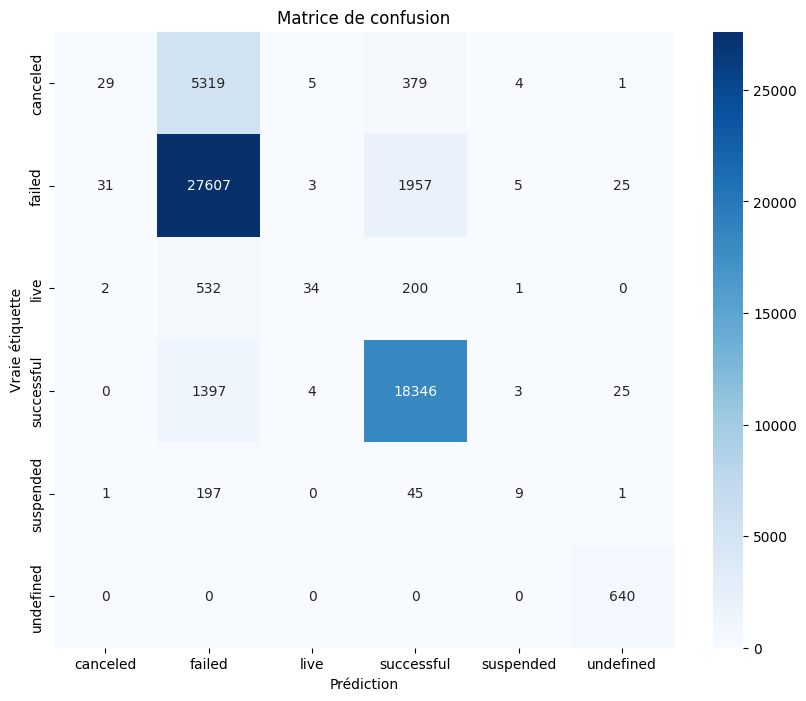

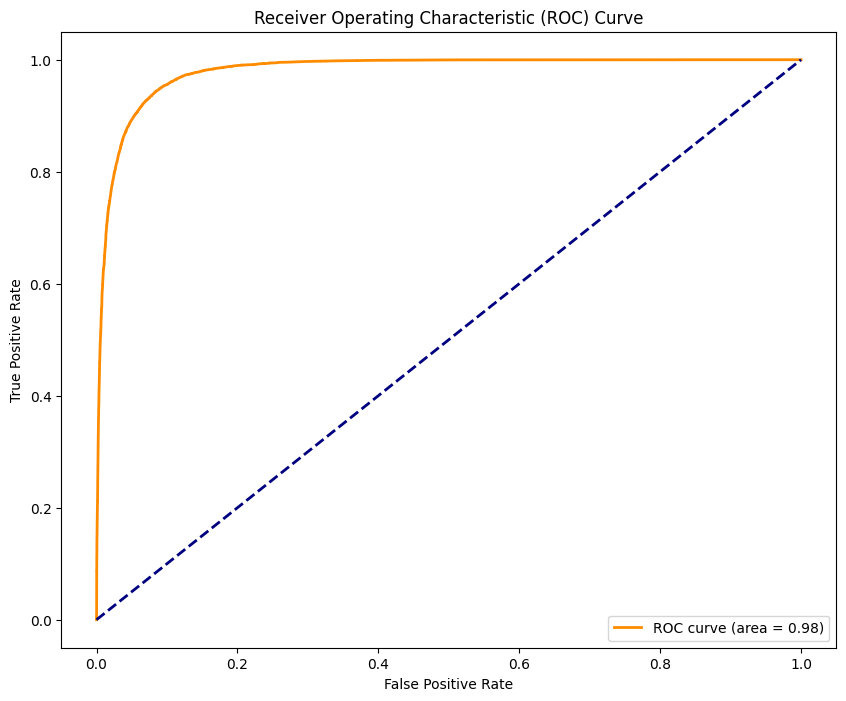

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Séparons les caractéristiques (X) de la cible (y)
X = kst[['main_category', 'category', 'currency', 'deadline', 'goal', 'launched', 'backers', 'country']]
y = kst['state']

# Divisons les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prétraitement des données
# On utilise ColumnTransformer pour appliquer différents traitements aux colonnes différentes
numeric_features = ['goal', 'backers']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['main_category', 'category', 'currency', 'country']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Modèle GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Pipeline complet
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model)])

# Entraînons le modèle
pipeline.fit(X_train, y_train)

# prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Évaluons les performances du modèle
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.title('Matrice de confusion')

# Calculons et tracons la courbe ROC pour la classe 'successful' (par exemple)
y_score_successful = pipeline.decision_function(X_test)[:, pipeline.classes_ == 'successful']
fpr, tpr, _ = roc_curve(y_test == 'successful', y_score_successful)
roc_auc = auc(fpr, tpr)

# Tracons la courbe ROC(Receiver Operating Characteristic)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Optimisation 2 par XGBoost (eXtreme Gradient Boosting)

Pour encore plus optimiser notre modèle, nous pouvons essayer une autre dériver de l'algorithme Gradient Boosting tel que XGBoost (eXtreme Gradient Boosting). XGBoost est connu pour sa puissance et sa capacité à gérer des ensembles de données complexes tout en minimisant le surajustement.

Accuracy: 0.8236857857117708

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.01      0.03      5737
           1       0.79      0.94      0.86     29628
           2       0.76      0.04      0.08       769
           3       0.89      0.92      0.91     19775
           4       0.50      0.03      0.05       253
           5       0.92      1.00      0.96       640

    accuracy                           0.82     56802
   macro avg       0.71      0.49      0.48     56802
weighted avg       0.79      0.82      0.78     56802



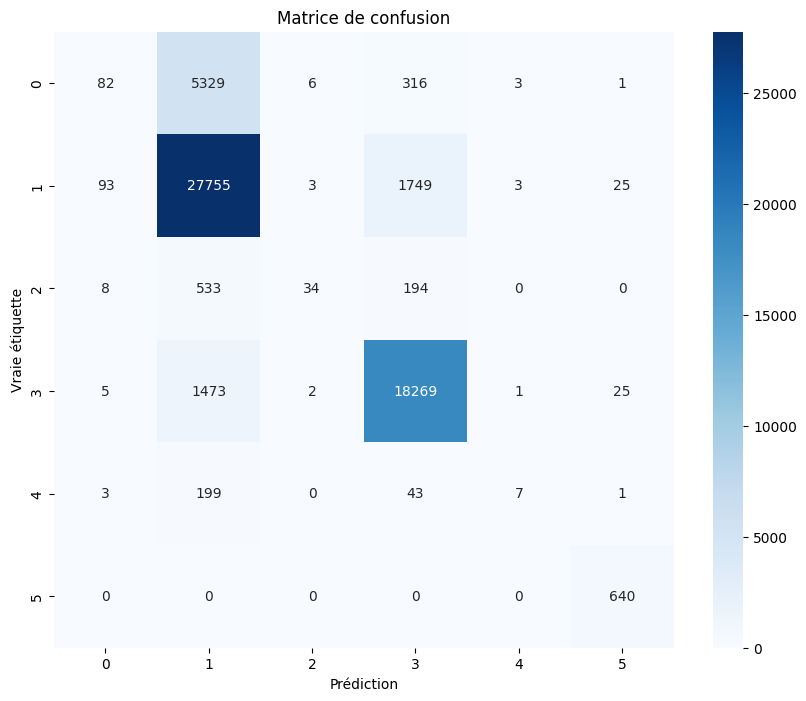

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Séparer les caractéristiques (X) de la cible (y)
X = kst[['main_category', 'category', 'currency', 'deadline', 'goal', 'launched', 'backers', 'country']]
y = kst['state']

# Divisons les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prétraitement des données
# On utilise ColumnTransformer pour appliquer différents traitements aux colonnes différentes
numeric_features = ['goal', 'backers']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['main_category', 'category', 'currency', 'country']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Instance de LabelEncoder pour la variable cible
label_encoder = LabelEncoder()

# Adaptons et transformons la variable cible y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Adaptons et transformons la variable cible y_test
y_test_encoded = label_encoder.transform(y_test)

# Modèle XGBoost
model = XGBClassifier(random_state=42)

# Pipeline complet
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model)])

# Entraînons le modèle avec les variables cibles codées
pipeline.fit(X_train, y_train_encoded)

# FPrédictions sur l'ensemble de test
y_pred_encoded = pipeline.predict(X_test)

# Évaluons les performances du modèle
print(f'Accuracy: {accuracy_score(y_test_encoded, y_pred_encoded)}')
print('\nClassification Report:\n', classification_report(y_test_encoded, y_pred_encoded))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.title('Matrice de confusion')
plt.show()

## Conclusion

En comparant les performances des différents modèles de machine learning que nous avons utilisés, nous pouvons tirer les conclusions suivantes :

1. **Random Forest Classifier :**
   - Avec une accuracy d'environ 80.8%, le modèle Random Forest présente des performances solides.
   - Il offre une bonne précision dans la prédiction des différentes classes du problème, mais il pourrait être amélioré.

2. **XGBoost Classifier :**
   - Le XGBoost Classifier affiche une amélioration avec une accuracy de 82.88% par rapport au Random Forest.
   - Il montre une capacité accrue à discriminer entre les différentes classes, ce qui se traduit par une précision globale plus élevée.

3. **Gradient Boosting :**
   - Le modèle Gradient Boosting présente une performance similaire au XGBoost, avec une accuracy d'environ 82.46%.
   - Bien qu'il soit légèrement inférieur en termes de précision globale par rapport au XGBoost, il offre toujours de bonnes performances.

En résumé, les trois modèles ont montré des performances robustes, mais le XGBoost Classifier a légèrement surpassé les autres en termes d'accuracy.